
# Create and print a NumPy array 'a' containing the elements 1, 2, 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
one_dimensional_array = np.array([12,30])
print(one_dimensional_array)


[12 30]


 # Create an array with 3 integers, starting from the default integer 0.

In [2]:

b = np.arange(3)
print(b)

[0 1 2]


# Create an array that starts from the integer 1, ends at 20, incremented by 3.

In [3]:
c = np.arange(1,20,3)
print(c)

[ 1  4  7 10 13 16 19]


What if you wanted to create an array with five evenly spaced values in the interval from 0 to 100?<br>As you may notice, you have 3 parameters that a function must take. One paremeter is the starting number, in this case 0, the final number 100 and the number of elements in the array, in this case,<br> 5. NumPy has a function that allows you to do specifically this by using np.linspace().

In [4]:
lin_spaced_arr = np.linspace(0,100,5, dtype=int)
print(lin_spaced_arr)

[  0  25  50  75 100]


 # Prints the data type of the array
 

In [5]:
char_arr = np.array(['Welcome to Math for Machine Learning'])
print(char_arr.dtype)

<U36


# More on NumPy arrays
One of the advantages of using NumPy is that you can easily create arrays with built-in functions such as:

np.ones() - Returns a new array setting values to one.<br>
np.zeros() - Returns a new array setting values to zero.<br>
np.empty() - Returns a new uninitialized array.<br>
np.random.rand() - Returns a new array with values chosen at random.<br>

In [6]:
ones_array = np.ones(3,dtype=int)
zeros_array = np.zeros(3)
empty_array = np.empty(1)
random_array = np.random.rand()
print(ones_array)
print(empty_array)



[1 1 1]
[0.]


In [7]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")


x_train = [1. 2.]
y_train = [300. 500.]


In [8]:
print(f"x_train.shape:{x_train.shape}")
print(f"x_train.shape:{y_train.shape[0]}")

x_train.shape:(2,)
x_train.shape:2


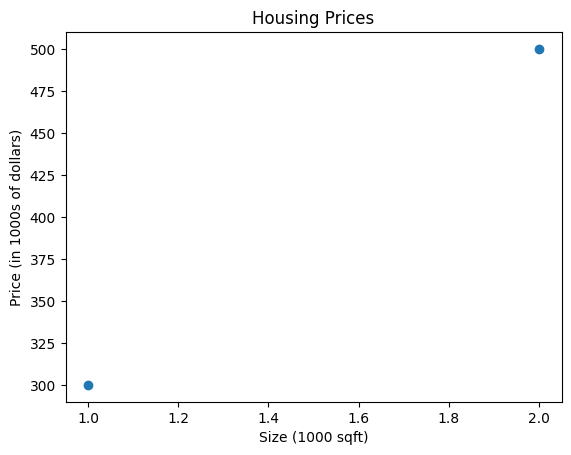

In [9]:
plt.scatter(x_train,y_train)
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

In [10]:
def compute_model_output(x, w, b):
  
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb


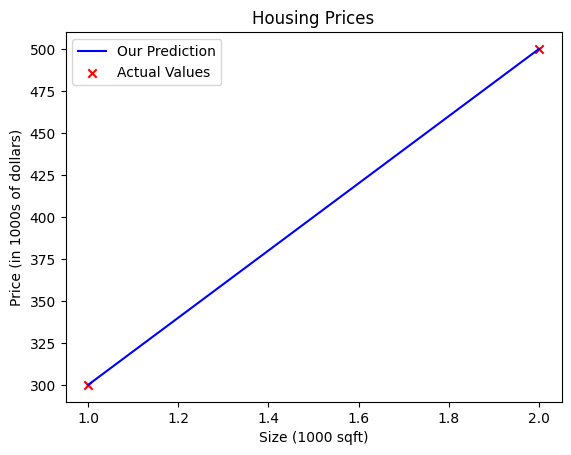

In [11]:
w = 200
b = 100
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of  𝑥
  are in 1000's of sqft,  𝑥
  is 1.2.

In [12]:
x_i = 1.2
cost_1200ft = w*x_i+b
print(f"${cost_1200ft} thousands dollar")

$340.0 thousands dollar


## Problem Statement
You would like a model which can predict housing prices given the size of the house.
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [13]:
x_train = np.array([1.0,2.0])
y_train = np.array([300.0,500.0])

## Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


In [14]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w*x[i]+b
        cost = (f_wb - y[i])**2
        cost_sum = cost_sum + cost 
    totalcost_sum = 1/2 * 1/m * cost_sum
    return totalcost_sum

In [15]:
def compute_gradientdescent(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
  
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x
        dj_db_i = (f_wb-y[i])
        dj_dw = dj_dw_i + dj_dw
        dj_db = dj_db_i + dj_db
    dj_dw = 1/m * dj_dw
    dj_db = 1/m * dj_db
    return dj_dw,dj_db


    
    